## Workshop Notebook

A notebook for creating graphs and interacting with implementation code in a more interactive way. Use at your convenience.

In [1]:
from bandit import *

import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
def plot(fns:list, params:list, labels:list, title:str="Plot"):
    assert len(fns) == len(params) == len(labels), "Number of functions, the number of function parameter collections, and the number of their labels must be the same."
    for i, fn in enumerate(fns):
        # print(f"{params[i]}")

        runs = fn(**params[i])
        plt.plot(runs, label=labels[i])

    plt.xlabel("step")
    plt.ylabel("average reward over 100 runs at step")
    plt.legend(labels)
    plt.title(title)
    plt.show()

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 

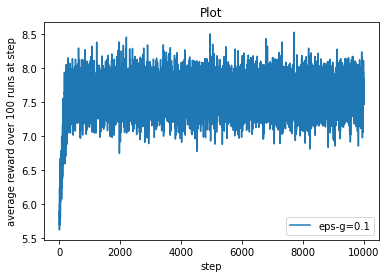

In [3]:
# peer_arms = [PeerArm(2, 1), PeerArm(4, 1), PeerArm(6, 1), PeerArm(8, 1), PeerArm(10, 1)]
peer_arms = create_peers(10, np.random.poisson, dict(lam=5.0), np.random.normal, dict(loc=5.0, scale=1.5), np.random.normal, dict(loc=1.0, scale=0.5))

plot(
    [epsilon], 
    [dict(strategy="eps-greedy", arms=peer_arms, eps=0.1)], 
    ["eps-g=0.1"])

# plot(
#     [epsilon, epsilon, epsilon], 
#     [dict(strategy="eps-greedy", arms=peer_arms, eps=0.1), 
#     dict(strategy="eps-first", arms=peer_arms, eps=0.1), 
#     dict(strategy="eps-decreasing", arms=peer_arms, eps=0.1)], 
#     ["eps-g=0.1", "eps-f=0.1", "eps-d=0.1"])

In [4]:
# peers = create_peers(5, np.random.poisson, dict(lam=5.0), np.random.normal, dict(loc=5.0, scale=1.5), np.random.normal, dict(loc=1.0, scale=0.5))